In [1]:
import psycopg2
import seaborn as seab
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTENC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
conexao = psycopg2.connect(host = "localhost", database = "Credito", user = "postgres", password = "123456" ,port = 5432)

In [3]:
cursor = conexao.cursor()
consulta = 'SELECT * FROM public."CREDITO"'
cursor.execute(consulta)

In [4]:
registros = cursor.fetchall()

In [5]:
registros

[(2, 48, 2, 1, 5951, 2, 3, 2, 1, 3, 2, 22, 3, 1, 1, 4, 1, 0, 0, 0),
 (3, 12, 1, 2, 2096, 2, 4, 2, 4, 3, 3, 49, 3, 1, 1, 3, 2, 0, 0, 1),
 (4, 42, 2, 3, 7882, 2, 4, 2, 4, 4, 4, 45, 3, 2, 1, 4, 2, 0, 0, 1),
 (5, 24, 3, 4, 4870, 2, 3, 3, 4, 3, 4, 53, 3, 2, 2, 4, 2, 0, 0, 0),
 (6, 36, 2, 2, 9055, 1, 3, 2, 4, 3, 4, 35, 3, 2, 1, 3, 2, 1, 0, 1),
 (7, 24, 2, 3, 2835, 3, 2, 3, 4, 3, 4, 53, 3, 1, 1, 4, 1, 0, 0, 1),
 (9, 12, 2, 1, 3059, 4, 4, 2, 2, 3, 4, 61, 3, 1, 1, 3, 1, 0, 0, 1),
 (11, 12, 2, 4, 1295, 2, 1, 3, 1, 3, 1, 25, 3, 3, 1, 4, 1, 0, 0, 0),
 (13, 12, 2, 1, 1567, 2, 3, 1, 1, 3, 1, 22, 3, 1, 1, 4, 1, 1, 0, 1),
 (14, 24, 1, 4, 1199, 2, 2, 4, 4, 3, 4, 60, 3, 1, 2, 3, 1, 0, 0, 0),
 (16, 24, 2, 1, 1282, 5, 3, 4, 1, 3, 2, 32, 3, 1, 1, 3, 1, 0, 0, 0),
 (17, 24, 1, 1, 2424, 1, 2, 4, 4, 3, 4, 53, 3, 1, 2, 4, 1, 0, 0, 1),
 (18, 30, 4, 6, 8072, 1, 1, 2, 4, 3, 3, 25, 1, 1, 3, 4, 1, 0, 0, 1),
 (19, 24, 2, 5, 12579, 2, 2, 4, 1, 3, 2, 44, 3, 2, 1, 1, 1, 1, 0, 0),
 (20, 24, 2, 1, 3430, 3, 2, 3, 4, 3, 2, 

In [6]:
cursor.close()
conexao.close()

In [7]:
base = pd.DataFrame(registros, columns= ["IdCredito","Duracao","HistoricoCredito","Proposito","Salario","Investimentos","Emprego","TempoParcelamento",
                                  "EstadoCivil","FiadorTerceiros","ResidenciaDesde","Idade","OutrosFinanciamentos","Habilitacao","EmprestimoExistente",
                                 "Profissao","Dependentes","SocioEmpresa","Estrangeiro","Status"])

In [8]:
base.head()

,IdCredito,Duracao,HistoricoCredito,Proposito,Salario,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habilitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [9]:
base.loc[base.duplicated(["IdCredito"], keep=False), "IdCredito"]

Series([], Name: IdCredito, dtype: int64)

In [10]:
base.drop(columns=["IdCredito"], inplace=True)

In [11]:
base

,Duracao,HistoricoCredito,Proposito,Salario,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habilitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [12]:
base["Duracao"].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao, dtype: float64

In [13]:
base["Duracao"].isnull().sum()

0

<Axes: xlabel='Duracao'>

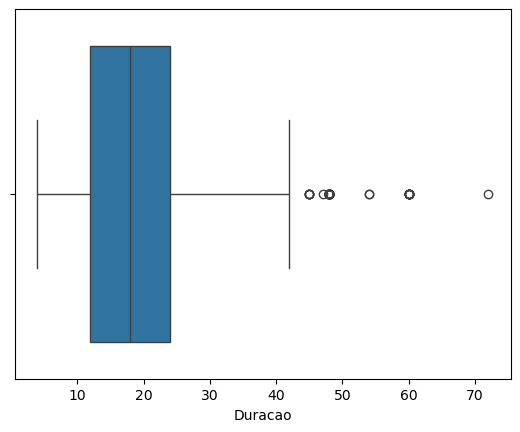

In [14]:
seab.boxplot(base["Duracao"], orient="h")

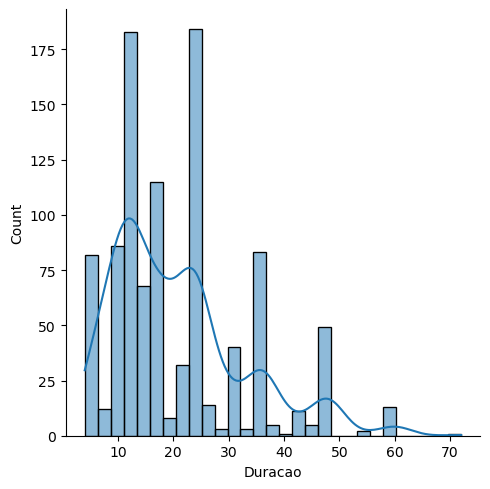

In [15]:
seab.displot(base["Duracao"], kde=True)

In [16]:
base.groupby(["HistoricoCredito"]).size()

HistoricoCredito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

<Axes: xlabel='HistoricoCredito'>

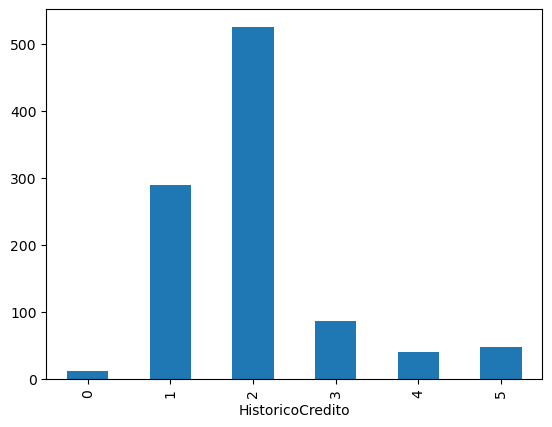

In [17]:
base.groupby(["HistoricoCredito"]).size().plot.bar()

In [18]:
base.loc[base["HistoricoCredito"] == 0, "HistoricoCredito"] = 2

In [19]:
base["HistoricoCredito"].isna().sum()

0

In [20]:
base.groupby(base["Proposito"]).size()

Proposito
1     280
2      50
3     181
4     234
5     103
6      97
7      12
8      22
9      12
10      9
dtype: int64

<Axes: xlabel='Proposito'>

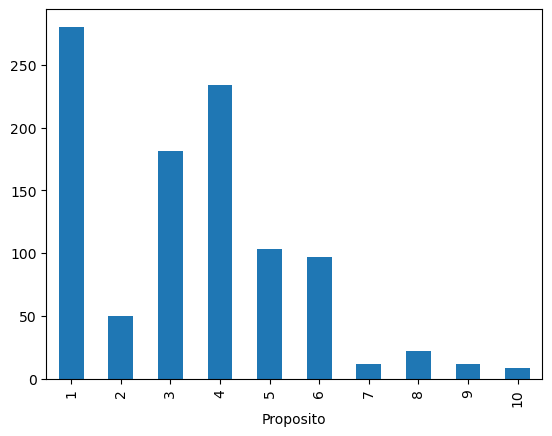

In [21]:
base.groupby(base["Proposito"]).size().plot.bar()

In [22]:
base["Proposito"].isnull().sum()

0

In [23]:
base.loc[base["Proposito"].isin([8,9,10]),"Proposito"] = 7

In [24]:
base["Salario"].isnull().sum()

0

In [25]:
base["Salario"].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Salario, dtype: float64

<Axes: xlabel='Salario'>

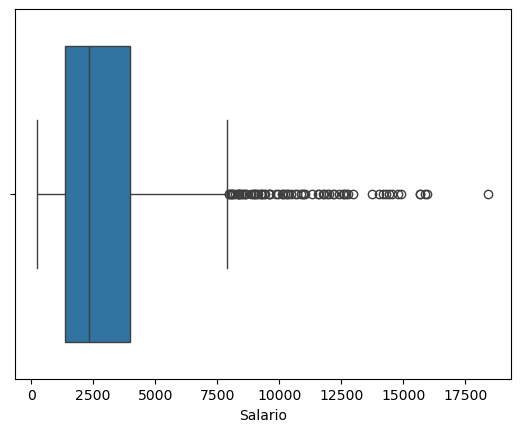

In [26]:
seab.boxplot(base["Salario"], orient="h")

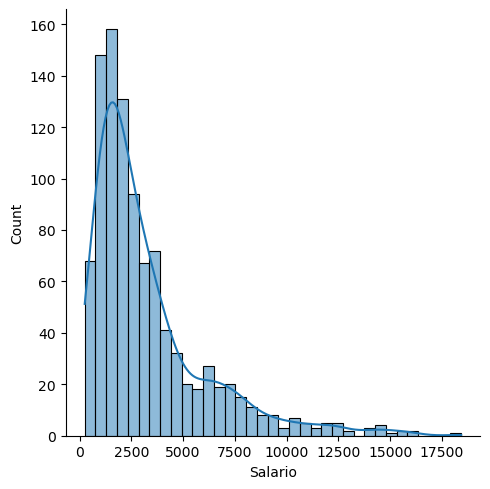

In [27]:
seab.displot(base["Salario"], kde=True)

In [28]:
base.groupby(base["Investimentos"]).size()

Investimentos
1    183
2    603
3     63
4     48
5    103
dtype: int64

<Axes: xlabel='Investimentos'>

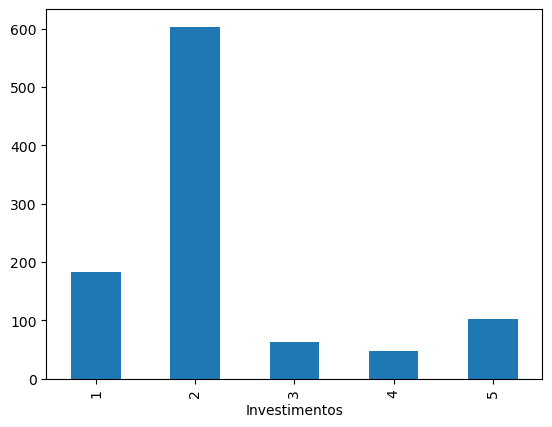

In [29]:
base.groupby(base["Investimentos"]).size().plot.bar()

In [30]:
base["Investimentos"].isnull().sum()

0

In [31]:
base.groupby(["Emprego"]).size()

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

<Axes: xlabel='Emprego'>

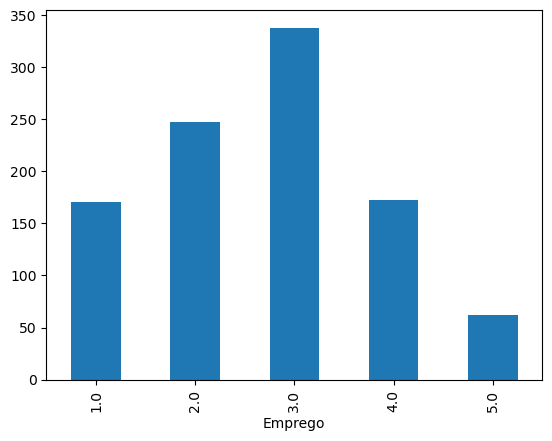

In [32]:
base.groupby(["Emprego"]).size().plot.bar()

In [33]:
base["Emprego"].isnull().sum()

10

In [34]:
base["Emprego"].fillna(3.0, inplace=True)

C:\Users\igorb\AppData\Local\Temp\ipykernel_9780\2705148091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base["Emprego"].fillna(3.0, inplace=True)


In [35]:
base.groupby(["TempoParcelamento"]).size()

TempoParcelamento
1    136
2    231
3    157
4    476
dtype: int64

<Axes: xlabel='TempoParcelamento'>

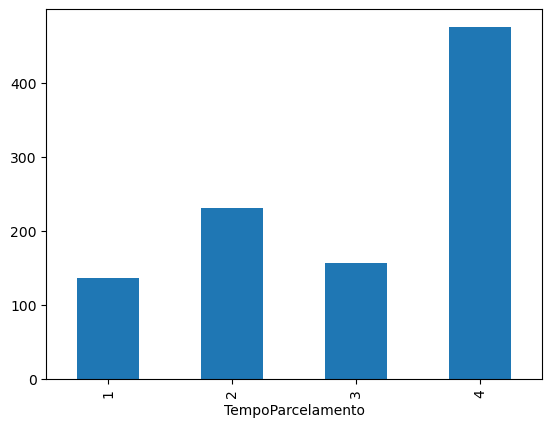

In [36]:
base.groupby(["TempoParcelamento"]).size().plot.bar()

In [37]:
base["TempoParcelamento"].isnull().sum()

0

In [38]:
base.groupby(["EstadoCivil"]).size()

EstadoCivil
1    310
2     50
3     92
4    548
dtype: int64

<Axes: xlabel='EstadoCivil'>

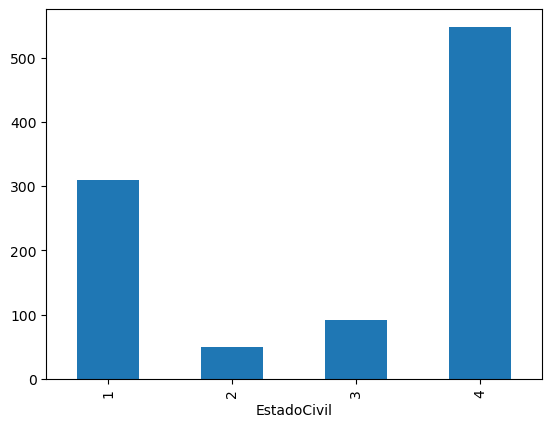

In [39]:
base.groupby(["EstadoCivil"]).size().plot.bar()

In [40]:
base["EstadoCivil"].isnull().sum()

0

In [41]:
base.groupby(["FiadorTerceiros"]).size()

FiadorTerceiros
1      1
2     39
3    908
4     52
dtype: int64

<Axes: xlabel='FiadorTerceiros'>

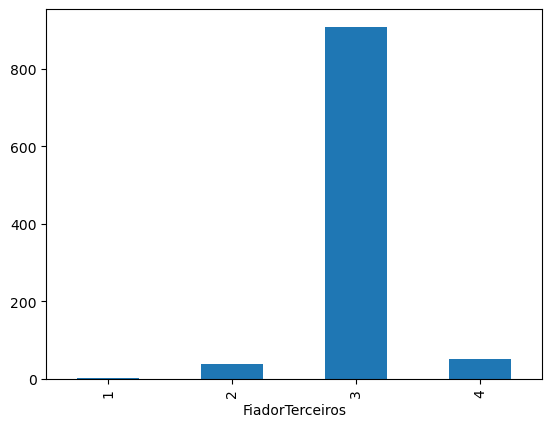

In [42]:
base.groupby(["FiadorTerceiros"]).size().plot.bar()

In [43]:
base.loc[base["FiadorTerceiros"] == 1, "FiadorTerceiros"] = 3

In [44]:
base["FiadorTerceiros"].isnull().sum()

0

In [45]:
base.groupby(["ResidenciaDesde"]).size()

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

<Axes: xlabel='ResidenciaDesde'>

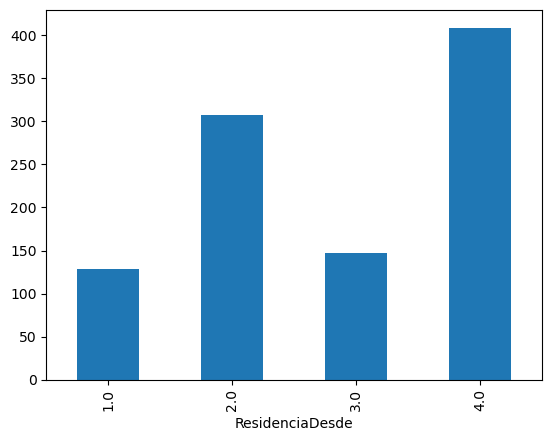

In [46]:
base.groupby(["ResidenciaDesde"]).size().plot.bar()

In [47]:
base["ResidenciaDesde"].isnull().sum()

7

In [48]:
base["ResidenciaDesde"].fillna(4.0, inplace = True)

C:\Users\igorb\AppData\Local\Temp\ipykernel_9780\2259887230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base["ResidenciaDesde"].fillna(4.0, inplace = True)


In [49]:
base["Idade"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

In [50]:
base["Idade"].isnull().sum()

0

<Axes: ylabel='Idade'>

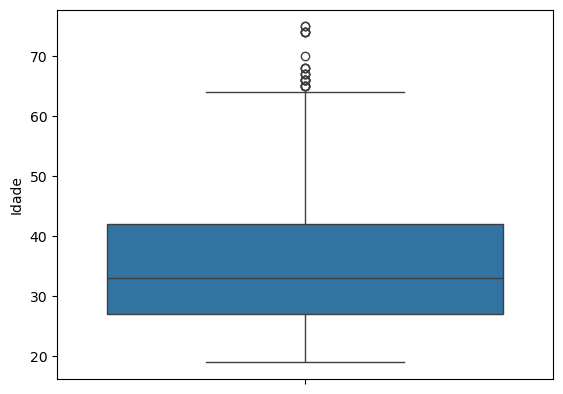

In [51]:
seab.boxplot(base["Idade"])

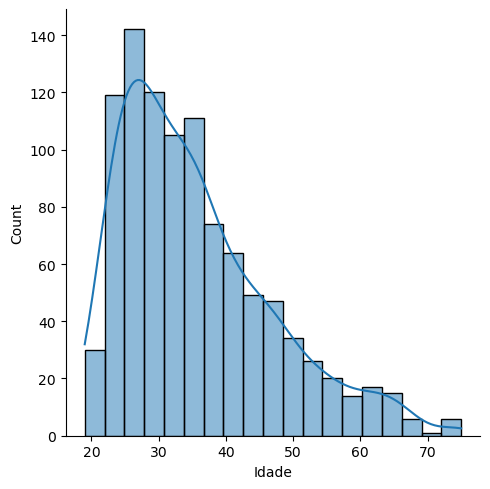

In [52]:
seab.displot(base["Idade"], kde=True)

In [53]:
base.groupby(["Idade"]).size() <= 2

Idade
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62     True
63    False
64    False
65    False
66    False
67    False
68    False
70     True
74    False
75     True
dtype: bool

In [54]:
base.loc[base["Idade"].isin([62,19,70,75]), "Idade"] = np.median(base["Idade"])

In [55]:
base.groupby(["OutrosFinanciamentos"]).size()

OutrosFinanciamentos
1    139
2     47
3    814
dtype: int64

<Axes: xlabel='OutrosFinanciamentos'>

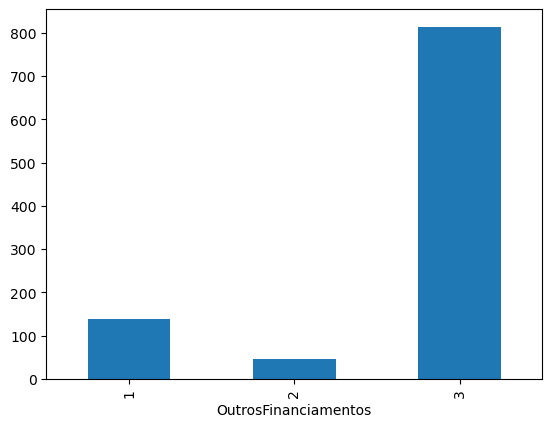

In [56]:
base.groupby(["OutrosFinanciamentos"]).size().plot.bar()

In [57]:
base["OutrosFinanciamentos"].isnull().sum()

0

In [58]:
base.groupby(["Habilitacao"]).size()

Habilitacao
1.0    709
2.0    107
3.0    175
dtype: int64

<Axes: xlabel='Habilitacao'>

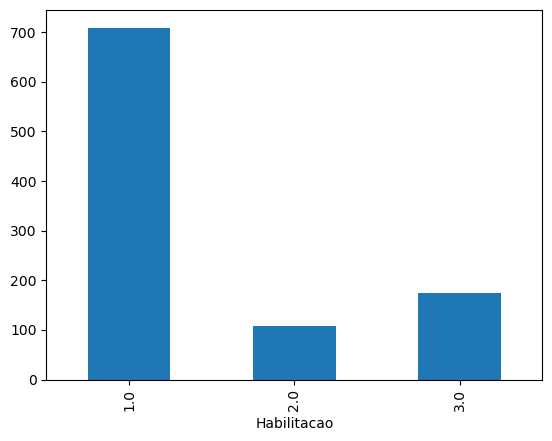

In [59]:
base.groupby(["Habilitacao"]).size().plot.bar()

In [60]:
base["Habilitacao"].isnull().sum()

9

In [61]:
base["Habilitacao"].fillna(1.0, inplace=True)

C:\Users\igorb\AppData\Local\Temp\ipykernel_9780\4140232368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base["Habilitacao"].fillna(1.0, inplace=True)


In [62]:
base.groupby(["EmprestimoExistente"]).size()

EmprestimoExistente
1    633
2    333
3     28
4      6
dtype: int64

<Axes: xlabel='EmprestimoExistente'>

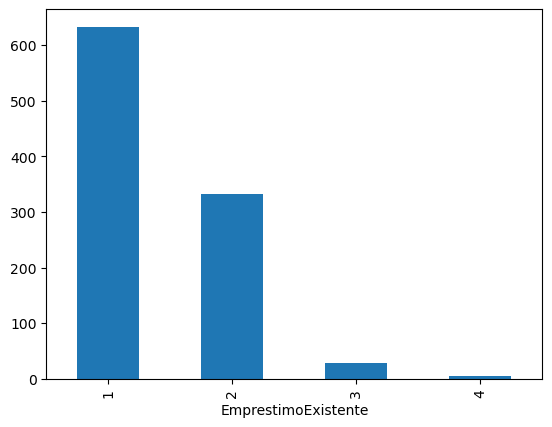

In [63]:
base.groupby(["EmprestimoExistente"]).size().plot.bar()

In [64]:
base.loc[base["EmprestimoExistente"] == 4, "EmprestimoExistente"] = 3

In [65]:
base.groupby(["Profissao"]).size()

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

<Axes: xlabel='Profissao'>

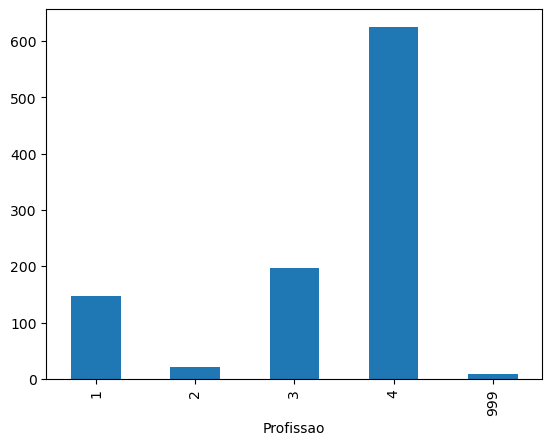

In [66]:
base.groupby(["Profissao"]).size().plot.bar()

In [67]:
base["Profissao"].isnull().sum()

0

In [68]:
base.loc[base["Profissao"].isin([999]), "Profissao"] = 4

In [69]:
base.groupby(["Dependentes"]).size()

Dependentes
1    845
2    155
dtype: int64

<Axes: xlabel='Dependentes'>

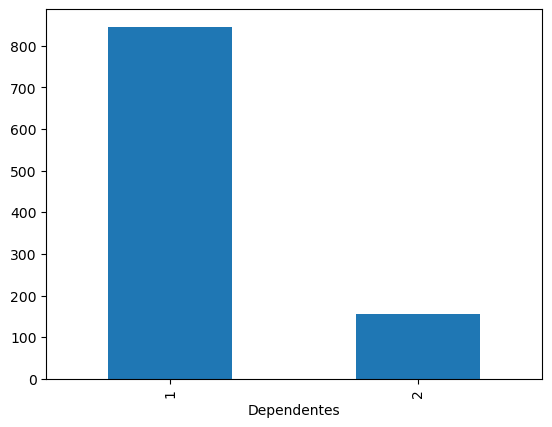

In [70]:
base.groupby(["Dependentes"]).size().plot.bar()

In [71]:
base["Dependentes"].isnull().sum()

0

In [72]:
base.groupby(["SocioEmpresa"]).size()

SocioEmpresa
0    596
1    404
dtype: int64

<Axes: xlabel='SocioEmpresa'>

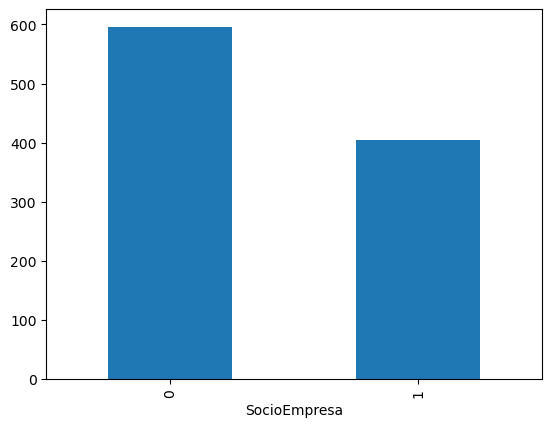

In [73]:
base.groupby(["SocioEmpresa"]).size().plot.bar()

In [74]:
base["SocioEmpresa"].isnull().sum()

0

In [75]:
base.groupby(["Estrangeiro"]).size()

Estrangeiro
0    963
1     37
dtype: int64

<Axes: xlabel='Estrangeiro'>

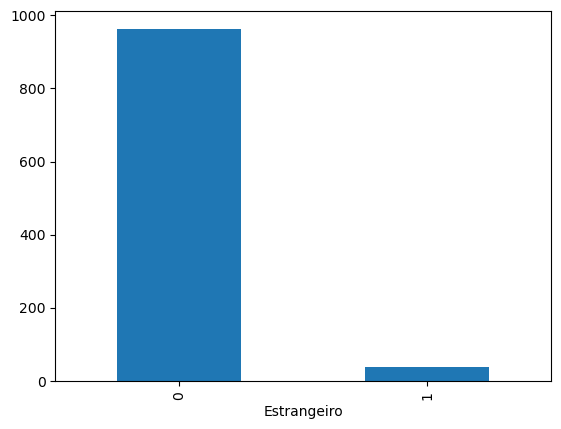

In [76]:
base.groupby(["Estrangeiro"]).size().plot.bar()

In [77]:
base["Estrangeiro"].isnull().sum()

0

In [78]:
base.dtypes

Duracao                   int64
HistoricoCredito          int64
Proposito                 int64
Salario                   int64
Investimentos             int64
Emprego                 float64
TempoParcelamento         int64
EstadoCivil               int64
FiadorTerceiros           int64
ResidenciaDesde         float64
Idade                     int64
OutrosFinanciamentos      int64
Habilitacao             float64
EmprestimoExistente       int64
Profissao                 int64
Dependentes               int64
SocioEmpresa              int64
Estrangeiro               int64
Status                    int64
dtype: object

In [79]:
base["Emprego"] = base["Emprego"].astype("int64")
base["ResidenciaDesde"] = base["ResidenciaDesde"].astype("int64")
base["Habilitacao"] = base["Habilitacao"].astype("int64")

In [80]:
base.groupby(["Status"]).size()

Status
0    300
1    700
dtype: int64

<Axes: xlabel='Status'>

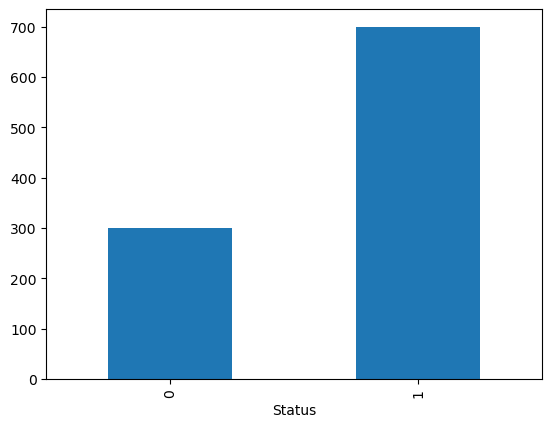

In [81]:
base.groupby(["Status"]).size().plot.bar()

In [82]:
dados = base.drop(columns=["Status"], axis=1)
classe = base["Status"]

In [83]:
sm = SMOTENC(random_state=1, categorical_features= [1,2,4,5,6,7,8,9,11,12,13,14,15,16,17])
dados_SMOTENC, classe_SMOTENC = sm.fit_resample(dados,classe)

In [84]:
dados_SMOTENC

,Duracao,HistoricoCredito,Proposito,Salario,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habilitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro
0,48,2,1,5951,2,3,2,1,3,2,22,3,1,1,4,1,0,0
1,12,1,2,2096,2,4,2,4,3,3,49,3,1,1,3,2,0,0
2,42,2,3,7882,2,4,2,4,4,4,45,3,2,1,4,2,0,0
3,24,3,4,4870,2,3,3,4,3,4,53,3,2,2,4,2,0,0
4,36,2,2,9055,1,3,2,4,3,4,35,3,2,1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,54,2,1,5817,2,3,2,1,3,2,25,3,1,2,4,1,1,0
1396,55,2,4,15693,2,2,1,4,3,2,58,3,1,1,1,1,1,0
1397,16,2,4,1218,2,3,4,1,3,3,46,3,1,1,3,1,1,0
1398,30,2,1,3083,2,1,3,4,3,4,23,3,3,1,4,1,0,0


In [85]:
classe_SMOTENC

0       0
1       1
2       1
3       0
4       1
       ..
1395    0
1396    0
1397    0
1398    0
1399    0
Name: Status, Length: 1400, dtype: int64

In [86]:
dados_SMOTENC

,Duracao,HistoricoCredito,Proposito,Salario,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habilitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro
0,48,2,1,5951,2,3,2,1,3,2,22,3,1,1,4,1,0,0
1,12,1,2,2096,2,4,2,4,3,3,49,3,1,1,3,2,0,0
2,42,2,3,7882,2,4,2,4,4,4,45,3,2,1,4,2,0,0
3,24,3,4,4870,2,3,3,4,3,4,53,3,2,2,4,2,0,0
4,36,2,2,9055,1,3,2,4,3,4,35,3,2,1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,54,2,1,5817,2,3,2,1,3,2,25,3,1,2,4,1,1,0
1396,55,2,4,15693,2,2,1,4,3,2,58,3,1,1,1,1,1,0
1397,16,2,4,1218,2,3,4,1,3,3,46,3,1,1,3,1,1,0
1398,30,2,1,3083,2,1,3,4,3,4,23,3,3,1,4,1,0,0


In [87]:
classCategorical = []
for i,valor in zip(range(len(classe_SMOTENC)), classe_SMOTENC):
    if valor == 1:
        classCategorical.append("Bom")
    else:
        classCategorical.append("Ruim")

In [88]:
X_treino,X_teste,y_treino,y_teste = train_test_split(dados_SMOTENC, classCategorical, test_size=0.3, random_state=0)

In [89]:
floresta = RandomForestClassifier(n_estimators=1000)
floresta.fit(X_treino,y_treino)

RandomForestClassifier(n_estimators=1000)

In [90]:
#Arvore
previsores = floresta.predict(X_teste)

In [91]:
#Arvore
matriz_confusao = confusion_matrix(previsores,y_teste)

In [92]:
#Arvore
(matriz_confusao[0,0] + matriz_confusao[1,1]) / (matriz_confusao[0,0] + matriz_confusao[0,1] + matriz_confusao[1,0] + matriz_confusao[1,1])

0.7761904761904762

In [93]:
stardardScaler = StandardScaler()
mormalization = MinMaxScaler()

In [94]:
dados_SMOTENC ["Idade"] = stardardScaler.fit_transform(dados_SMOTENC[["Idade"]])
dados_SMOTENC[["Salario","Duracao"]] = mormalization.fit_transform(dados_SMOTENC[["Salario","Duracao"]])

In [95]:
pd.DataFrame(classe_SMOTENC,columns=["Status"]).groupby(["Status"]).size()

Status
0    700
1    700
dtype: int64

In [96]:
X_treino,X_teste,y_treino,y_teste = train_test_split(dados_SMOTENC, classe_SMOTENC, test_size=0.3, random_state=0)

In [97]:
#Criação do modelo
len(y_treino)

980

In [98]:
modelo = Sequential()

In [99]:
modelo.add(Dense(units=64,activation="relu",input_dim = 18))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64,activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1,activation="sigmoid"))

C:\Users\igorb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
modelo.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
early = EarlyStopping(monitor="loss", mode="min",verbose=1,patience=30)
modelo.fit(X_treino,y_treino, epochs=1000,batch_size=30,callbacks=[early], validation_data=(X_teste,y_teste))

Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5269 - loss: 0.7496 - val_accuracy: 0.6619 - val_loss: 0.6566
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 0.6788 - val_accuracy: 0.6786 - val_loss: 0.6409
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.6758 - val_accuracy: 0.6714 - val_loss: 0.6333
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.6579 - val_accuracy: 0.6810 - val_loss: 0.6226
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.6590 - val_accuracy: 0.6714 - val_loss: 0.6185
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 0.6269 - val_accuracy: 0.6881 - val_loss: 0.6087
Epoch 7/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - loss: 0.6295 - val_accuracy: 0.7024 - val_loss: 0.6021
Epoch 8/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.6035 - val_accuracy: 0.

In [102]:
previsores = modelo.predict(X_teste) 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [103]:
for i,valor in zip(range(len(previsores)), previsores):
    if valor > 0.5:
        previsores[i] = 1
    else valor < 0.5:
        previsores[i] = 0

In [104]:
previsores

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [105]:
matriz_confusao = confusion_matrix(previsores,y_teste)

In [106]:
matriz_confusao

array([[152,  54],
       [ 66, 148]], dtype=int64)

In [107]:
(matriz_confusao[0,0] + matriz_confusao[1,1]) / (matriz_confusao[0,0] + matriz_confusao[0,1] + matriz_confusao[1,0] + matriz_confusao[1,1])

0.7142857142857143